Analyzing the trends of Covid-19 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/kaggle/input/corona-virus-report/covid_19_clean_complete.csv')

In [4]:
data.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [5]:
data.sample(10)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
19384,Qinghai,China,35.745200,95.995600,2020-04-05,18,0,18,0,Western Pacific
1306,NaN,Albania,41.153300,20.168300,2020-01-27,0,0,0,0,Europe
23899,NaN,Lithuania,55.169400,23.881300,2020-04-22,1370,38,357,975,Europe
11935,NaN,Saudi Arabia,23.885942,45.079162,2020-03-07,5,0,0,5,Eastern Mediterranean
27653,NaN,Botswana,-22.328500,24.684900,2020-05-06,23,1,8,14,Africa
37166,NaN,Finland,61.924110,25.748151,2020-06-12,7073,325,6200,548,Europe
48005,Yukon,Canada,64.282300,-135.000000,2020-07-23,13,0,0,13,Americas
38888,NaN,Lesotho,-29.610000,28.233600,2020-06-18,4,0,2,2,Africa
39556,NaN,Lebanon,33.854700,35.862300,2020-06-21,1587,32,1068,487,Eastern Mediterranean
5726,Anguilla,United Kingdom,18.220600,-63.068600,2020-02-12,0,0,0,0,Europe


In [6]:
data.shape

(49068, 10)

In [7]:
data.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

There are many null data in Province/State column, and for the analysis, we don't need that. So we will drop this column

In [8]:
data.drop(['Province/State'],axis=1,inplace=True)

In [9]:
data.columns

Index(['Country/Region', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [10]:
data.shape

(49068, 9)

As we have to analyse the data according to the date. We have to find the confirmed death according to the date. So we will group Date and Confirmed column.

In [11]:
data = data.groupby(['Date'])['Confirmed'].sum().reset_index()
data.tail()

,Date,Confirmed
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


In [12]:
data.isnull().sum()

Date         0
Confirmed    0
dtype: int64

In [13]:
data['Date']=pd.to_datetime(data['Date'])

In [14]:
data.head()

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [15]:
data.dtypes

Date         datetime64[ns]
Confirmed             int64
dtype: object

In [16]:
data_prophet = data.copy()

In [17]:
data_prophet.rename(columns={'Date':'ds','Confirmed':'y'},inplace = True)
data_prophet.head()

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [18]:
from prophet import Prophet
m = Prophet()

In [19]:
model = m.fit(data_prophet)

09:57:49 - cmdstanpy - INFO - Chain [1] start processing
09:57:50 - cmdstanpy - INFO - Chain [1] done processing


In [20]:
m.seasonalities

OrderedDict([('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [21]:
future = model.make_future_dataframe(periods=30,freq='D')

In [22]:
future.head()

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26


In [23]:
prediction = model.predict(future)

In [24]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.777905e+03,-1.199838e+05,9.209792e+04,-9.777905e+03,-9.777905e+03,-10998.184272,-10998.184272,-10998.184272,-10998.184272,-10998.184272,-10998.184272,0.0,0.0,0.0,-2.077609e+04
1,2020-01-23,-7.055743e+03,-1.116267e+05,9.880935e+04,-7.055743e+03,-7.055743e+03,-1105.731772,-1105.731772,-1105.731772,-1105.731772,-1105.731772,-1105.731772,0.0,0.0,0.0,-8.161475e+03
2,2020-01-24,-4.333581e+03,-1.009354e+05,1.115896e+05,-4.333581e+03,-4.333581e+03,10049.827496,10049.827496,10049.827496,10049.827496,10049.827496,10049.827496,0.0,0.0,0.0,5.716247e+03
3,2020-01-25,-1.611419e+03,-9.265586e+04,1.205651e+05,-1.611419e+03,-1.611419e+03,13740.639044,13740.639044,13740.639044,13740.639044,13740.639044,13740.639044,0.0,0.0,0.0,1.212922e+04
4,2020-01-26,1.110743e+03,-9.296266e+04,1.141657e+05,1.110743e+03,1.110743e+03,7254.883671,7254.883671,7254.883671,7254.883671,7254.883671,7254.883671,0.0,0.0,0.0,8.365627e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2020-08-22,2.143975e+07,2.105226e+07,2.180015e+07,2.105396e+07,2.180806e+07,13740.639044,13740.639044,13740.639044,13740.639044,13740.639044,13740.639044,0.0,0.0,0.0,2.145349e+07
214,2020-08-23,2.164381e+07,2.123374e+07,2.204494e+07,2.123620e+07,2.202927e+07,7254.883671,7254.883671,7254.883671,7254.883671,7254.883671,7254.883671,0.0,0.0,0.0,2.165106e+07
215,2020-08-24,2.184787e+07,2.136825e+07,2.229444e+07,2.141450e+07,2.225765e+07,-2145.781007,-2145.781007,-2145.781007,-2145.781007,-2145.781007,-2145.781007,0.0,0.0,0.0,2.184572e+07
216,2020-08-25,2.205193e+07,2.157960e+07,2.249848e+07,2.159106e+07,2.248205e+07,-16795.653159,-16795.653159,-16795.653159,-16795.653159,-16795.653159,-16795.653159,0.0,0.0,0.0,2.203513e+07


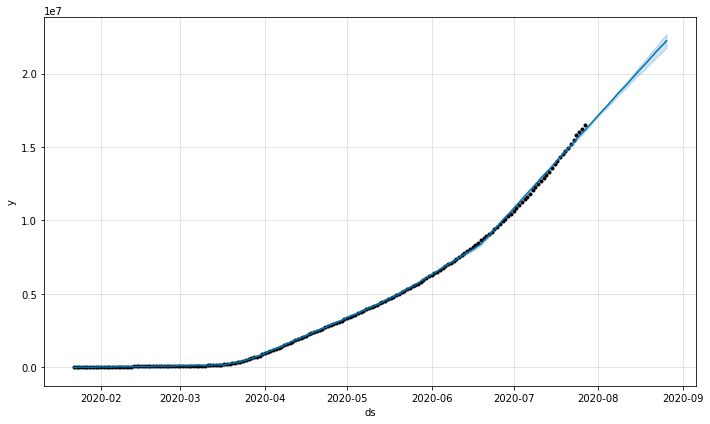

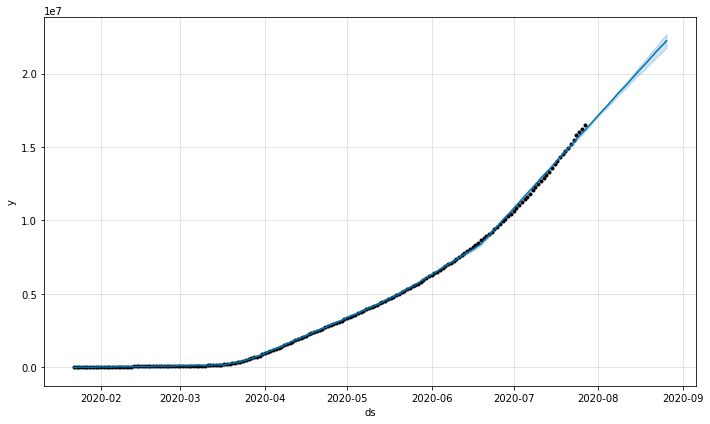

In [25]:
model.plot(prediction)

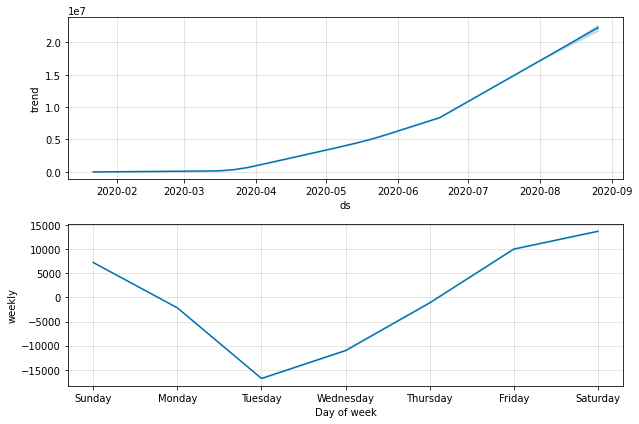

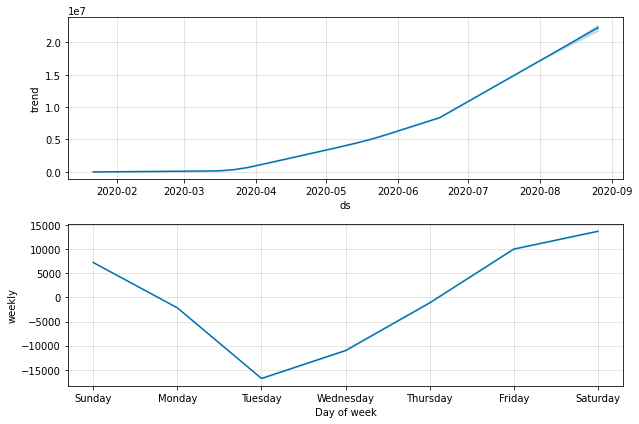

In [26]:
model.plot_components(prediction)

In [27]:
from prophet.diagnostics import cross_validation
data_cv = cross_validation(model,horizon='30 days',period='15 days',initial='90 days')

  0%|          | 0/5 [00:00<?, ?it/s]

09:57:52 - cmdstanpy - INFO - Chain [1] start processing
09:57:53 - cmdstanpy - INFO - Chain [1] done processing
09:57:53 - cmdstanpy - INFO - Chain [1] start processing
09:57:53 - cmdstanpy - INFO - Chain [1] done processing
09:57:54 - cmdstanpy - INFO - Chain [1] start processing
09:57:54 - cmdstanpy - INFO - Chain [1] done processing
09:57:54 - cmdstanpy - INFO - Chain [1] start processing
09:57:55 - cmdstanpy - INFO - Chain [1] done processing
09:57:55 - cmdstanpy - INFO - Chain [1] start processing
09:57:55 - cmdstanpy - INFO - Chain [1] done processing


In [28]:
data_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-04-29,3.201065e+06,3.196096e+06,3.206538e+06,3185195,2020-04-28
1,2020-04-30,3.285434e+06,3.279212e+06,3.291778e+06,3268876,2020-04-28
2,2020-05-01,3.369641e+06,3.361086e+06,3.377634e+06,3355922,2020-04-28
3,2020-05-02,3.450903e+06,3.439005e+06,3.461956e+06,3437608,2020-04-28
4,2020-05-03,3.530367e+06,3.512473e+06,3.546783e+06,3515244,2020-04-28


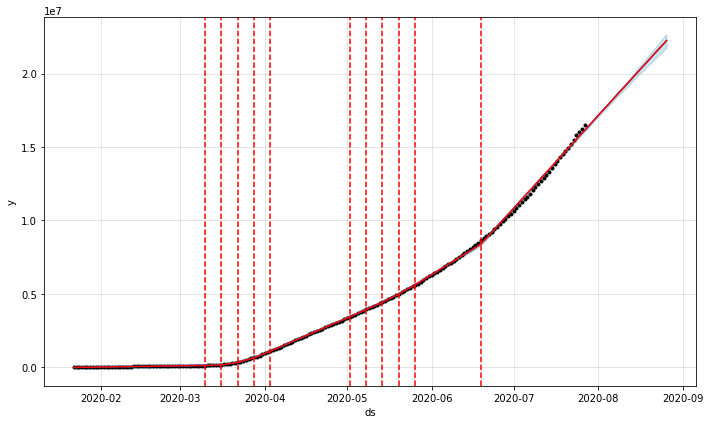

In [29]:
from prophet.plot import add_changepoints_to_plot
fig = model.plot(prediction)
a = add_changepoints_to_plot(fig.gca(),model,prediction)

In [30]:
from prophet.diagnostics import performance_metrics
data_perf = performance_metrics(data_cv)
data_perf.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,2.746449e+10,165724.139309,129605.276177,0.016907,0.017703,0.017090,0.000000
1,4 days,3.800768e+10,194955.572545,151809.878244,0.019370,0.022519,0.019616,0.000000
2,5 days,5.207975e+10,228209.883562,175660.858105,0.021820,0.025652,0.022142,0.066667
3,6 days,6.984333e+10,264278.886150,202662.991040,0.024599,0.026650,0.025013,0.133333
4,7 days,9.068788e+10,301144.291424,233027.732457,0.027882,0.031209,0.028408,0.200000


/opt/conda/lib/python3.7/site-packages/prophet/plot.py:544: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/opt/conda/lib/python3.7/site-packages/prophet/plot.py:545: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


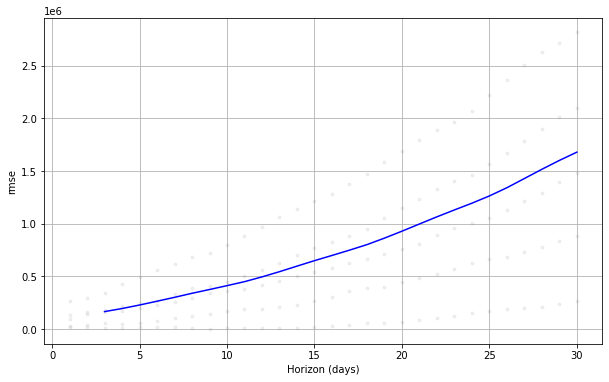

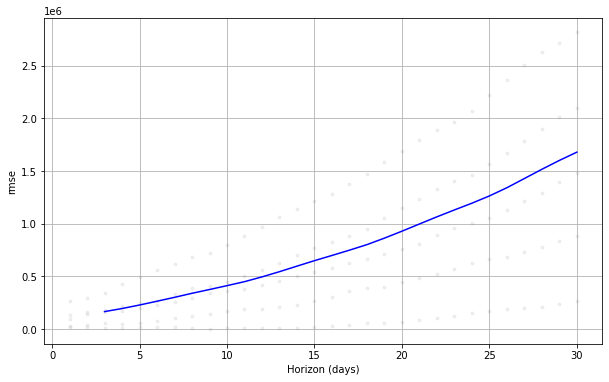

In [31]:
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(data_cv,metric='rmse')

In [32]:
data_world = pd.read_csv('/kaggle/input/corona-virus-report/covid_19_clean_complete.csv')
data_world.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [33]:
data_world.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

Let's find the same analysis for the India country

In [34]:
data_india = data_world[data_world['Country/Region']=='India']
data_india.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
129,NaN,India,20.593684,78.96288,2020-01-22,0,0,0,0,South-East Asia
390,NaN,India,20.593684,78.96288,2020-01-23,0,0,0,0,South-East Asia
651,NaN,India,20.593684,78.96288,2020-01-24,0,0,0,0,South-East Asia
912,NaN,India,20.593684,78.96288,2020-01-25,0,0,0,0,South-East Asia
1173,NaN,India,20.593684,78.96288,2020-01-26,0,0,0,0,South-East Asia


In [35]:
data_india.shape

(188, 10)

In [36]:
data_india = data_india.groupby(['Date'])['Confirmed'].sum().reset_index()
data_india.tail()

,Date,Confirmed
183,2020-07-23,1288108
184,2020-07-24,1337024
185,2020-07-25,1385635
186,2020-07-26,1435616
187,2020-07-27,1480073


In [37]:
data_india_prophet = data_india.copy()

In [38]:
data_india_prophet.rename(columns={'Date':'ds','Confirmed':'y'},inplace=True)
data_india_prophet.sample(5)

,ds,y
108,2020-05-09,62808
43,2020-03-05,30
19,2020-02-10,3
36,2020-02-27,3
27,2020-02-18,3


In [39]:
m=Prophet()

In [40]:
model = m.fit(data_india_prophet)

09:57:58 - cmdstanpy - INFO - Chain [1] start processing
09:57:58 - cmdstanpy - INFO - Chain [1] done processing


In [41]:
m.seasonalities

OrderedDict([('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [42]:
future = model.make_future_dataframe(periods=30,freq='D')

In [43]:
future.head()

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26


In [44]:
prediction_india = model.predict(future)

In [45]:
prediction_india

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-1.548985e+03,-3.815184e+04,3.216165e+04,-1.548985e+03,-1.548985e+03,-2134.741002,-2134.741002,-2134.741002,-2134.741002,-2134.741002,-2134.741002,0.0,0.0,0.0,-3.683726e+03
1,2020-01-23,-1.508219e+03,-3.467665e+04,3.218748e+04,-1.508219e+03,-1.508219e+03,-1032.704655,-1032.704655,-1032.704655,-1032.704655,-1032.704655,-1032.704655,0.0,0.0,0.0,-2.540924e+03
2,2020-01-24,-1.467453e+03,-3.476991e+04,3.362410e+04,-1.467453e+03,-1.467453e+03,194.861999,194.861999,194.861999,194.861999,194.861999,194.861999,0.0,0.0,0.0,-1.272591e+03
3,2020-01-25,-1.426686e+03,-3.506769e+04,3.509610e+04,-1.426686e+03,-1.426686e+03,1132.042675,1132.042675,1132.042675,1132.042675,1132.042675,1132.042675,0.0,0.0,0.0,-2.946437e+02
4,2020-01-26,-1.385920e+03,-3.567076e+04,3.567992e+04,-1.385920e+03,-1.385920e+03,2200.947810,2200.947810,2200.947810,2200.947810,2200.947810,2200.947810,0.0,0.0,0.0,8.150277e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2020-08-22,2.010518e+06,1.948447e+06,2.066965e+06,1.957893e+06,2.054553e+06,1132.042675,1132.042675,1132.042675,1132.042675,1132.042675,1132.042675,0.0,0.0,0.0,2.011650e+06
214,2020-08-23,2.036684e+06,1.974321e+06,2.097775e+06,1.981003e+06,2.084089e+06,2200.947810,2200.947810,2200.947810,2200.947810,2200.947810,2200.947810,0.0,0.0,0.0,2.038885e+06
215,2020-08-24,2.062849e+06,1.996997e+06,2.123201e+06,2.004007e+06,2.113155e+06,2648.595691,2648.595691,2648.595691,2648.595691,2648.595691,2648.595691,0.0,0.0,0.0,2.065498e+06
216,2020-08-25,2.089015e+06,2.017503e+06,2.148511e+06,2.027255e+06,2.142513e+06,-3009.002519,-3009.002519,-3009.002519,-3009.002519,-3009.002519,-3009.002519,0.0,0.0,0.0,2.086006e+06


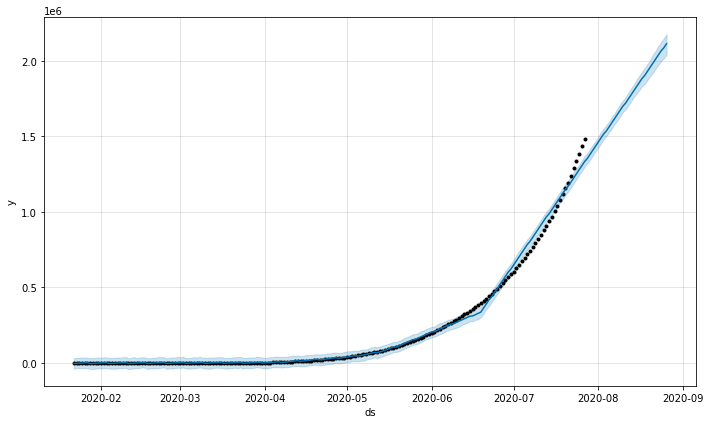

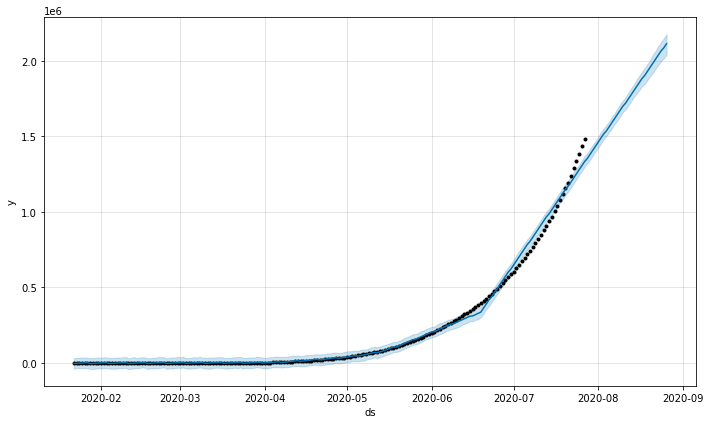

In [46]:
model.plot(prediction_india)

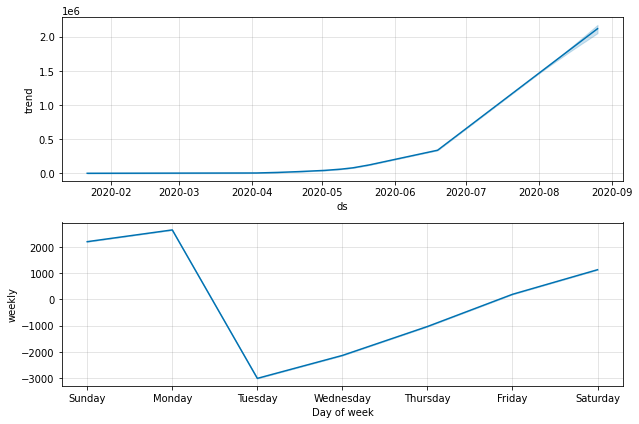

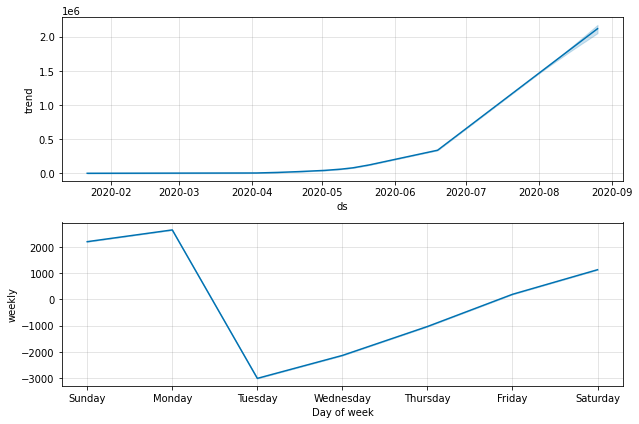

In [47]:
model.plot_components(prediction_india)

In [48]:
data_india_cv = cross_validation(model,horizon='30 days',period='15 days',initial='90 days')

  0%|          | 0/5 [00:00<?, ?it/s]

09:58:00 - cmdstanpy - INFO - Chain [1] start processing
09:58:00 - cmdstanpy - INFO - Chain [1] done processing
09:58:01 - cmdstanpy - INFO - Chain [1] start processing
09:58:01 - cmdstanpy - INFO - Chain [1] done processing
09:58:02 - cmdstanpy - INFO - Chain [1] start processing
09:58:02 - cmdstanpy - INFO - Chain [1] done processing
09:58:02 - cmdstanpy - INFO - Chain [1] start processing
09:58:02 - cmdstanpy - INFO - Chain [1] done processing
09:58:03 - cmdstanpy - INFO - Chain [1] start processing
09:58:03 - cmdstanpy - INFO - Chain [1] done processing


In [49]:
data_india_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-04-29,30540.357905,29977.881382,31148.410941,33062,2020-04-28
1,2020-04-30,31773.499719,31203.190496,32356.602289,34863,2020-04-28
2,2020-05-01,32949.548824,32376.579483,33517.313011,37257,2020-04-28
3,2020-05-02,34211.513535,33601.241076,34832.588154,39699,2020-04-28
4,2020-05-03,35487.026408,34832.438966,36086.314818,42505,2020-04-28


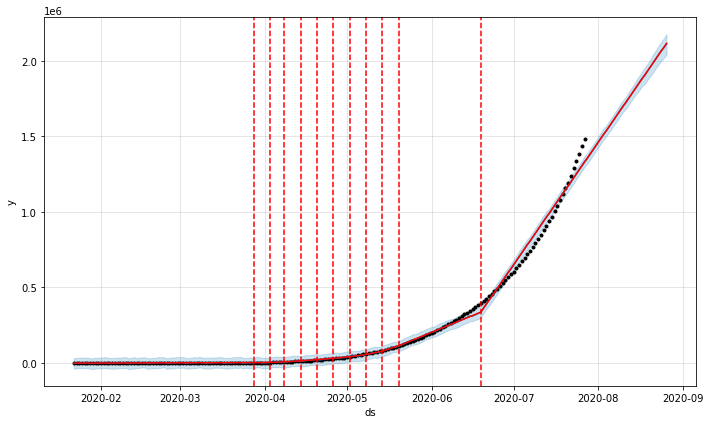

In [50]:
fig=model.plot(prediction_india)
a_india = add_changepoints_to_plot(fig.gca(),model,prediction_india)

In [51]:
data_india_perf = performance_metrics(data_india_cv)
data_india_perf.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,8.865722e+08,29775.362113,23639.893467,0.103332,0.100834,0.109199,0.0
1,4 days,1.151182e+09,33929.071950,27201.283843,0.117179,0.116349,0.124790,0.0
2,5 days,1.484432e+09,38528.331231,31136.790322,0.132176,0.133205,0.141933,0.0
3,6 days,1.928463e+09,43914.263291,35747.694189,0.149044,0.144063,0.161692,0.0
4,7 days,2.528432e+09,50283.513453,41159.557690,0.166833,0.165109,0.182875,0.0


/opt/conda/lib/python3.7/site-packages/prophet/plot.py:544: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/opt/conda/lib/python3.7/site-packages/prophet/plot.py:545: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


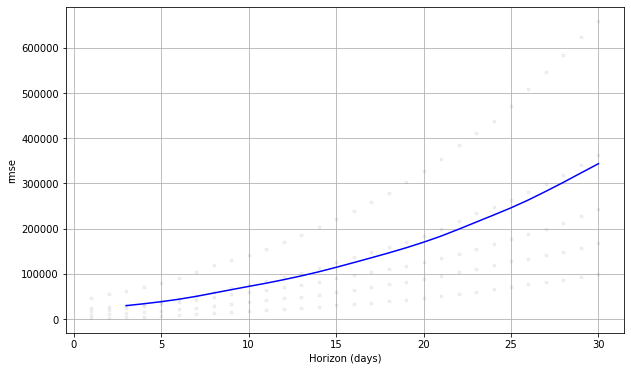

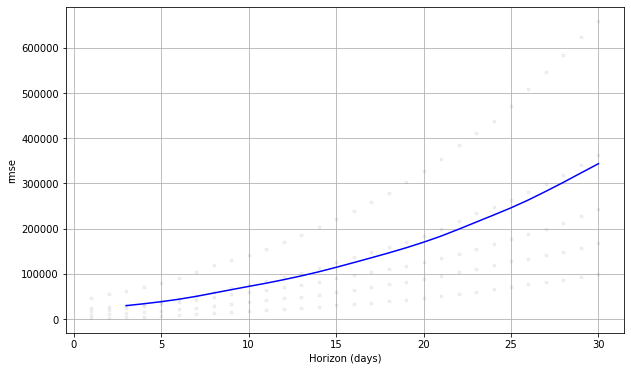

In [52]:
plot_cross_validation_metric(data_india_cv,metric='rmse')